# Quick timing of converting a table of positions and radii to a lit of markers

In [8]:
from astropy.table import Table
from matplotlib import pyplot as plt
from regions import CirclePixelRegion, PixCoord
import numpy as np

rng =  np.random.default_rng()

## Define function to do the conversion

In [2]:
def table_to_regions(table):
    regions = []
    pcs = PixCoord(table["x"], table["y"])
    for pc, radius in zip(pcs, table["radius"]):
        regions.append(CirclePixelRegion(pc, radius))
    return regions

## Time the conversion

In [6]:
timings = []
markers_to_time = [1_000, 10_000, 100_000, 1_000_000, 10_000_000]
for n_markers in markers_to_time:
    x = rng.uniform(low=0.0, high=1000.0, size=n_markers)
    y = rng.uniform(low=0.0, high=1000.0, size=n_markers)
    tab = Table({"x": x, "y": y})
    tab["radius"] = rng.uniform(5, 15, size=n_markers)
    %timeit -q -v time table_to_regions(tab)
    print(f"With {n_markers} rows conversion to regions took {time}")
    timings.append(time)

With 1000 rows conversion to regions took 2.73 ms ± 10.8 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
With 10000 rows conversion to regions took 28.5 ms ± 362 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)
With 100000 rows conversion to regions took 294 ms ± 6.44 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
With 1000000 rows conversion to regions took 2.91 s ± 11.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
With 10000000 rows conversion to regions took 30.3 s ± 440 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


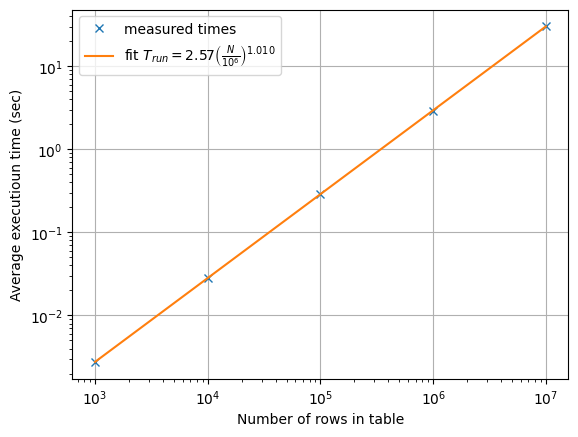

In [52]:
plt.figure()
avg_time = [time.average for time in timings]
plt.plot(markers_to_time, avg_time, "x", label="measured times")
a_poly = np.polynomial.Polynomial.fit(np.log10(markers_to_time), np.log10(avg_time), 1)

plt.plot(markers_to_time, 10**a_poly(np.log10(markers_to_time)), 
         label="fit $T_{run} = " + f"{10**a_poly(0) * 1e6:.3g}" + r"\left(\frac{N}{10^6}\right)^{" + f"{a_poly.deriv()(0):.3f}" + "}$")
plt.loglog()
plt.legend()
plt.xlabel("Number of rows in table")
plt.ylabel("Average executioun time (sec)")
plt.grid()